In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
t = np.arange(0, 2*np.pi, 0.1*np.pi)
xgen = np.sin(t)
y = 4*xgen+2

In [23]:
bias = np.ones((xgen.shape[0], 1))
xin = np.append(np.matrix(xgen).T, bias, axis = 1)

In [24]:
def trainAdaline(x, y, eta, tol, maxEpocas):
    N = np.shape(x)[0]
    n = np.shape(x)[1]
    w = np.random.rand(n, 1)

    nEpocas = 0
    erroEpoca = tol + 1
    evec = np.zeros(maxEpocas)
    xseq = np.arange(N)

    while erroEpoca > tol and nEpocas < maxEpocas: 
        ei2 = 0

        for i in range(N):
            irand = xseq[i]
            yhat_i = (np.dot(x[irand], w))
            e_i = y[irand] - yhat_i
            dw = eta*e_i*x[irand]
            w = w + dw.T
            ei2 = ei2 + e_i**2
        nEpocas += 1

        evec[nEpocas] = ei2/N
        erroEpoca = evec[nEpocas]
    
    return w, evec[0:nEpocas]

[[3.870663  ]
 [1.99422685]]


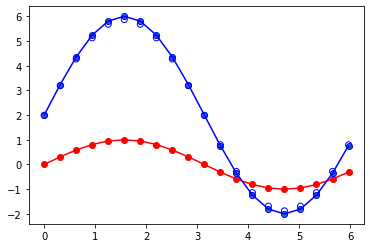

In [25]:
eta = 1
tol = 0.01
maxEpocas = 200
wt, evec = trainAdaline(xin, np.matrix(y).T, eta, tol, maxEpocas)

print(wt)
y_testhat = xgen*wt[0,0] + wt[1,0]

plt.scatter(t, xgen, color = 'r')
plt.scatter(t, y, edgecolors = 'b')
plt.scatter(t, y_testhat, edgecolors = 'b', facecolor = 'none')
plt.plot(t, xgen, color = 'r')
plt.plot(t, y, color = 'b')
plt.show()